# Отчёт по анализу данных и моделированию потока в трубопроводе по данным эксперимента PRONTOMultiphaseFlow

## 1. Обзор данных

В таблице 1 представлены данные, полученные в этом тематическом исследовании.

Таблица 1. Доступные данные в ходе эксперимента  

| Измеряемая переменная              | Частота выборки         | Доступность | Платформа |
| :--------------------------------- | ---------------         | -----------  | :-------- |
| Переменные процесса                | 1 Гц                    | Непрерывная  | DeltaV    |
| Журналы тревог, событий, изменений | Упрвляется событиями    | Дискретная   | DeltaV    |
| Доплеровский ультразвуковой датчик | 10 кГц                  | 60 сек       | LabView   |
| Датчики давления высокочастотные   | 5 кГц                   | 60 сек       | LabView   |
| Видео                              | -                       | 30-60 сек    | Камера    |

Данные процесса были собраны с помощью DeltaV, которая представляет собой систему SCADA, предоставленную Emerson Process Management. Он отвечает за контроль над механизмом и предоставляет возможность получить данные процесса. DeltaV производит выборку всех подключенных датчиков с частотой 1 Гц. Переменные процесса представлены в таблице 2 с тегами и единицами измерения.

Таблица 2. Переменные процесса

| Тег датчика        | Измеряемая переменная процесса                         | Единица измерения |
| :----------------- | :----------------------------------------------------- | :---------------- |
| FT305/302          | Расход воздуха на входе                                | См3/ч            |
| FT305              | Температура входящего воздуха                          | С                 |
| PT312              | Давление подачи воздуха                                | барг              |
| FT102/104          | Расход воды на входе                                   | кг/с              |    
| FT102              | Температура воды на входе                              | С                 |
| FT102              | Плотность воды на входе                                | кг/м3            |
| PT417              | Давление в зоне смешения                               | барг             |
| PT408              | Давление в верхней части стояка                        | барг              |
| PT403              | Давление в верхнем сепараторе                          | барг              |
| FT404              | Расход воздуха на выходе из верхнего сепаратора        | м3/ч             |
| FT406              | Расход воды на выходе из верхнего сепаратора           | кг/с              |
| PT501              | Давление в 3-х фазном сепараторе                       | барг              |
| PIC501             | Клапан выпуска воздуха в 3-х фазном сепараторе         | %                 |
| LI502              | Трехуровневый водомасляный сепаратор фаз               | %                 |
| LI503              | Уровень коалесцера воды                                | %                 |
| LVC502-SR          | Выпускной клапан коагулятора воды                      | %                 |
| LI101              | Уровень резервуара для воды                            | м                 |
| FIC302/PID1/OUT.CV | Регулятор расхода воздуха на входе 1 открытие клапана  | %                 |
| FIC302/PID1/SP.CV  | Уставка регулятора расхода воздуха на входе 1          | См3/ч            |
| FIC302/PID1/PV.CV  | Регулятор расхода воздуха на входе 1 значение процесса | См3/ч            |
| FIC301/PID1/OUT.CV | Регулятор расхода воздуха на входе 2 открытия клапана  | %                 |
| FIC301/PID1/SP.CV  | Уставка регулятора расхода воздуха на входе 2          | См3/ч            |
| FIC301/PID1/PV.CV  | Регулятор расхода воздуха на входе 2 значение процесса | См3/ч            |
| FIC102/PID1/OUT.CV | Регулятор расхода воды на входе 1 открытие клапана     | %                 |
| FIC102/PID1/SP.CV  | Уставка 1 регулятора расхода воды на входе             | кг/с              |
| FIC102/PID1/PV.CV  | Регулятор расхода воды на входе 1 значение процесса    | кг/с             |
| FIC101/PID1/OUT.CV | Регулятор расхода воды на входе 2 открытия клапана     | %                 |
| FIC101/PID1/SP.CV  | Уставка 2 регулятора расхода воды на входе             | кг/с              |
| FIC101/PID1/PV.CV  | Регулятор расхода воды на входе 2 значение процесса    | кг/с              |

Тревоги, события и изменения регистрировались на протяжении всего процесса.

Таблица 3. Параметры журнала тревог, событий и изменений

| Имя параметра      | Описание параметра                                                 |
| :----------------- | :----------------------------------------------------------------- | 
| Date/Time          | Дата и время в порядке убывания (с точностью до мсек)              |
| Event Type         | Тревога / событие / изменение                                      | 
| Category           | Инструмент / Процесс / Пользователь / Устройство                   | 
| Area               | Секция тестирования / Секция измерения / Разделение / Область A (пользовательские изменения) | 
| Node               | Имя информационного узла                                           |
| Unit               | Пустое поле                                                        | 
| Module             | Имена тегов                                                        | 
| Module Description | Описание                                                           | 
| Parameter          | Параметр тревоги / события / изменения, если применимо             | 
| State              | Активный / неактивный / подтвержденный / неподтвержденный          | 
| Level              | Информация / Рекомендации / Предупреждение / Критическое состояние | 
| Desc1              | Описание 1 (расширенные имена тегов)                               | 
| Desc2              | Описание 2 (Код ошибки / новые значения / и т.д.)                  | 

Неинвазивный фиксируемый датчик непрерывного волнового допплеровского ультразвука использовался для эксперимента. Датчик имеет два кристаллических преобразователя. Один из преобразователей излучает ультразвуковой сигнал на частоте 500 кГц, в то время как другой датчик принимает отраженный сигнал от многофазного потока. Полученный выходной сигнал, который обрабатывается электроникой датчика, обеспечивает допплеровский сдвиг частоты как выходного сигнала напряжения в диапазоне ± 10В.

Датчик обеспечивает доплеровскую частоту сдвига напряжения в виде сигнала выходного напряжения. Предполагая, что все рассеиватели имеют одинаковую скорость $𝑣$, допплеровский сдвиг $f_d$ прошедшего ультразвука определяется выражением 
$$ f_d = 2𝑓_{t} {𝑣 \over 𝑐} 𝑐𝑜𝑠𝜃 → 𝑣 = {𝑓_{d}𝑐 \over 2𝑓_{t}𝑐𝑜𝑠𝜃},$$ где $f_d$ - доплеровский сдвиг частоты, $f_t$ - частота прошедшего ультразвука, $𝑣$ - средняя скорость потока, $c$ - это скорость звука в жидкости и $𝜃$ - угол между скоростью потока и ультразвуковым лучом.

Для всех тестируемых сценариев высокочастотные данные о давлении записывались с помощью LabView с частотой дискретизации 5 кГц в течение 60 секунд в установившемся режиме. 9 датчиков давления представлены в таблице 4. Измерения приведены в единицах бар.


Таблица 4. Переменные давления

| Тег датчика | Переменная измеренного давления                                | Тег Excel |
| :---------- | :------------------------------------------------------------- | --------- |
| B14         | Перед горизонтальной линией                                    | P4        |
| B13         | После горизонтальной линии до основания стояка                 | P5        |
| B12         | Основание стояка                                               | P6        |
| B11         | Вертикальный стояк после прозрачной трубы за основанием стояка | P7        |
| B10         | Середина вертикального стояка, перед S-образной формой         | P8        |
| B20         | Вершина S-образной формы                                       | P13       |
| B08         | Середина наклонной части S-образной формы                      | P14       |
| B09         | Низ S-образной формы                                           | P15       |
| B05         | После S-образной формы стояка и верха стояка                   | P17       |

Также есть и видеоролики проводимых испытаний. 2-дюймовый трубопровод имеет прозрачные секции как вверху, так и внизу стояка. Видео были сняты в течение 30-60 секунд во время различных тестируемых сценариев, в образовательных целях и для обеспечения лучшего понимания потока.

## 2. Варианты экспериментов, представленные в данных

Всего в данных представлено 5 различных сценариев:
1. Нормальные рабочие условия (Test 9, 11).
2. Пробки - это периодическая неисправность, связанная с накапливанием жидкости в нижней части стояка, блокирующей газ (Test 10).
3. Утечка воздуха (Test 4-6).
4. Блокировка воздуха (Test 2-3).
5. Перенаправление потока (Test 7-8).

## 3. Обзорный визуальный анализ данных

Таблица 5. Визуальный анализ данных

|-                     |Тест  |Данные обработки|Высокочастотное давление|Ультразвуковые данные|Сигналы тревоги и события|Ролики|
|:---------------------|:---  |:-----------|:---------|:------------|:------------------|:-------------|
|Блокировка воздуха    |Test2 |0907Testday2|0907Test2 |0907Test2_UT |0907Testday2_AlmEvt|--------------|
|Блокировка воздуха    |Test3 |0907Testday2|0907Test3 |0907Test3_UT |0907Testday2_AlmEvt|--------------|
|Утечка воздуха        |Test4 |0907Testday2|0907Test4 |0907Test4_UT |0907Testday2_AlmEvt|--------------|
|Утечка воздуха        |Test5 |0911Testday3|0911Test5 |0911Test5_UT |0911Testday3_AlmEvt|0911Test5_VID |
|Утечка воздуха        |Test6 |0911Testday3|0911Test6 |0911Test6_UT |0911Testday3_AlmEvt|0911Test6_VID |
|Перенаправление потока|Test7 |0911Testday3|0911Test7 |0911Test7_UT |0911Testday3_AlmEvt|0911Test7_VID |
|Перенаправление потока|Test8 |0911Testday3|0911Test8 |0911Test8_UT |0911Testday3_AlmEvt|0911Test8_VID |
|Условия потока        |Test9 |0912Testday4|0912Test9 |0912Test9_UT |0912Testday4_AlmEvt|0912Test9_VID |
|Условия потока        |Test10|0912Testday4|0912Test10|0912Test10_UT|0912Testday4_AlmEvt|0912Test10_VID|
|Условия потока        |Test11|0626Testday5|----------|-------------|0626TestDay5_AlmEvt|--------------|
|Тип файла             |.csv  |.csv        |.csv      |.csv         |.csv               |.mp4          |

Данные разбиты на несколько групп: по ошибкам, номерам тестов, дням. В день 2 попали данные с блокировкой и утечкой воздуха, в день 3 попали данные с утечкой воздуха и перенаправление потока, в день 4 попали данные с нормальными условиями и пробками, в день 5 попали данные с нормальными условиями. 

Также имеются фотографии установки, дополнительные данные процесса, логи операций, техническая документация.

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, LeaveOneOut
%matplotlib inline

In [256]:
test11_data = pd.read_csv('./PRONTO benchmark case study/C0 Normal and Slugging conditions/Test11/Process Data/0626Testday5.csv', header=[1,2], encoding='UTF-8')
test11_data.head()

,Unnamed: 0_level_0,FT305/OUT.CV,FT302/OUT.CV,FT305/AI2/OUT.CV,PT312/OUT.CV,FT102/OUT.CV,FT104/OUT.CV,FT102/AI3/OUT.CV,FT102/AI2/OUT.CV,PT417/OUT.CV,...,Unnamed: 60_level_0,Unnamed: 61_level_0,Unnamed: 62_level_0,Unnamed: 63_level_0,Unnamed: 64_level_0,Unnamed: 65_level_0,Unnamed: 66_level_0,Unnamed: 67_level_0,Unnamed: 68_level_0,Unnamed: 69_level_0
,TIMESTAMP,Air In1,Air In2,Air T,Air P,Water In1,Water In2,Water T,Water Density,Mixture zone P,...,Unnamed: 60_level_1,Unnamed: 61_level_1,Unnamed: 62_level_1,Unnamed: 63_level_1,Unnamed: 64_level_1,Unnamed: 65_level_1,Unnamed: 66_level_1,Unnamed: 67_level_1,Unnamed: 68_level_1,Unnamed: 69_level_1
0,43277.45833,101.634102,0.000124,23.260031,0.659946,0.001626,0.0,25.51152,997.748718,0.611568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43277.45834,101.762901,0.000123,23.247890,0.662950,0.001626,0.0,25.51152,997.748413,0.615642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43277.45836,101.721199,0.000122,23.235760,0.665954,0.001627,0.0,25.27585,997.747986,0.620235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43277.45837,101.644897,0.000121,23.223619,0.670465,0.001627,0.0,25.19729,997.747620,0.624829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43277.45838,101.573402,0.000120,23.211491,0.675479,0.001627,0.0,25.19729,997.747314,0.629422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
test11_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 70 columns):
(Unnamed: 0_level_0, TIMESTAMP)                     3601 non-null float64
(FT305/OUT.CV, Air In1)                             3601 non-null float64
(FT302/OUT.CV, Air In2)                             3601 non-null float64
(FT305/AI2/OUT.CV, Air T)                           3601 non-null float64
(PT312/OUT.CV, Air P)                               3601 non-null float64
(FT102/OUT.CV, Water In1)                           3601 non-null float64
(FT104/OUT.CV, Water In2)                           3601 non-null float64
(FT102/AI3/OUT.CV, Water T)                         3601 non-null float64
(FT102/AI2/OUT.CV, Water Density )                  3601 non-null float64
(PT417/OUT.CV, Mixture zone P)                      3601 non-null float64
(PT419/DP.CV, DPriser)                              3601 non-null float64
(PT408/OUT.CV, riser outlet P)                      3601 non-null float64
(PIC4

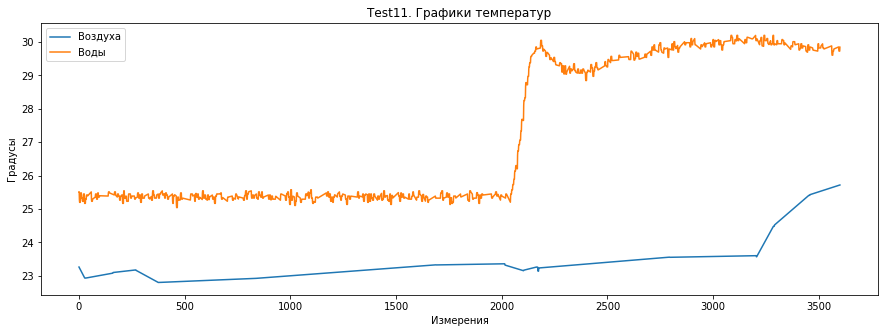

In [258]:
plt.figure(figsize = (15, 5))
plt.title('Test11. Графики температур')
plt.xlabel('Измерения')
plt.ylabel('Градусы')
plt.plot(test11_data['FT305/AI2/OUT.CV'], label = 'Воздуха')
plt.plot(test11_data['FT102/AI3/OUT.CV'], label = 'Воды')
plt.legend()

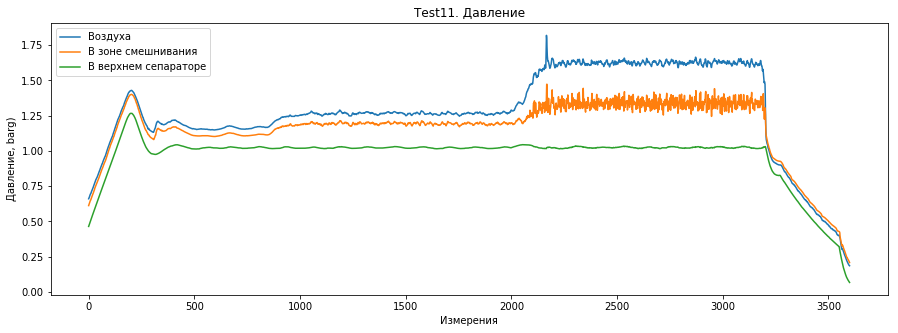

In [259]:
plt.figure(figsize = (15, 5))
plt.title('Test11. Давление')
plt.xlabel('Измерения')
plt.ylabel('Давление, barg)')
plt.plot(test11_data['PT312/OUT.CV'], label = 'Воздуха')
plt.plot(test11_data['PT417/OUT.CV'], label = 'В зоне смешнивания')
plt.plot(test11_data['PT403/OUT.CV'], label = 'В верхнем сепараторе')
plt.legend()

## 4. Выбор данных для анализа

### 4.1. Показания датчиков для анализа

В нижеперечисленных тестах были использованы данные с датчиков скорости воды, скорости воздуха, давления на разных участках.

### 4.2. Файлы с данными, манипуляции с данными

Для тестов были использованы уже размеченные данные по дням (Testday2 - 09.07, Testday3 - 09.11, Testday4 - 09.12). Полученные данные были рассмотрены как отдельно, так и совместно.

In [260]:
data2 = pd.read_csv('./PRONTO benchmark case study/Pre-processed data/Aligned and labelled alarm and process data/Testday2_merged.csv')
data3 = pd.read_csv('./PRONTO benchmark case study/Pre-processed data/Aligned and labelled alarm and process data/Testday3_merged.csv')
data4 = pd.read_csv('./PRONTO benchmark case study/Pre-processed data/Aligned and labelled alarm and process data/Testday4_merged.csv')

In [261]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12420 entries, 0 to 12419
Data columns (total 30 columns):
FIC301               12420 non-null int64
FIC302               12420 non-null int64
LI405                12420 non-null int64
LI502                12420 non-null int64
PT312                12420 non-null int64
VC303                12420 non-null int64
VC401                12420 non-null int64
VC403                12420 non-null int64
VC404                12420 non-null int64
VC405                12420 non-null int64
VC406                12420 non-null int64
VLV303               12420 non-null int64
AirIn                12420 non-null float64
Air.T                12420 non-null float64
Air.P                12420 non-null float64
WaterIn              12420 non-null float64
Water.T              12420 non-null float64
Water.Density        12420 non-null float64
Mixture.zone.P       12420 non-null float64
riser.outlet.P       12420 non-null float64
P.topsep             12420 non-null

In [262]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21300 entries, 0 to 21299
Data columns (total 30 columns):
FIC301               21300 non-null int64
FIC302               21300 non-null int64
LI405                21300 non-null int64
LI505                21300 non-null int64
PT312                21300 non-null int64
VC303                21300 non-null int64
VC401                21300 non-null int64
VC403                21300 non-null int64
VC404                21300 non-null int64
VC405                21300 non-null int64
VC406                21300 non-null int64
VLV303               21300 non-null int64
AirIn                21300 non-null float64
Air.T                21300 non-null float64
Air.P                21300 non-null float64
WaterIn              21300 non-null float64
Water.T              21300 non-null float64
Water.Density        21300 non-null float64
Mixture.zone.P       21300 non-null float64
riser.outlet.P       21300 non-null float64
P.topsep             21300 non-null

In [263]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 30 columns):
FIC301               11700 non-null int64
FIC302               11700 non-null int64
LI405                11700 non-null int64
LI502                11700 non-null int64
PT312                11700 non-null int64
VC303                11700 non-null int64
VC401                11700 non-null int64
VC403                11700 non-null int64
VC404                11700 non-null int64
VC405                11700 non-null int64
VC406                11700 non-null int64
VLV303               11700 non-null int64
AirIn                11700 non-null float64
Air.T                11700 non-null float64
Air.P                11700 non-null float64
WaterIn              11700 non-null float64
Water.T              11700 non-null float64
Water.Density        11700 non-null float64
Mixture.zone.P       11700 non-null float64
riser.outlet.P       11700 non-null float64
P.topsep             11700 non-null

Разность давлений вынесено в отдельный столбец для удобства в последующих вычислениях.

In [264]:
data2['deltaP'] = abs(data2['riser.outlet.P'] - data2['Mixture.zone.P'])
data3['deltaP'] = abs(data3['riser.outlet.P'] - data3['Mixture.zone.P'])
data4['deltaP'] = abs(data4['riser.outlet.P'] - data4['Mixture.zone.P'])

In [265]:
def plot_graph(data, colors):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,14))
    ax1.scatter(data.index, data['deltaP'], c=colors, s=2)
    ax1.set_ylabel('Разность давлений, barg')
    ax2.scatter(data.index, data['AirIn'], c=colors, s=2)
    ax2.set_ylabel('Воздух, м3/час')
    ax3.scatter(data.index, data['WaterIn'], c=colors, s=2)
    ax3.set_ylabel('Вода, кг/с')

def get_colors(data):
    colors = []
    for c in data['Fault']:
        if c == 'Normal':
            colors.append('green')
        elif c == 'Air blockage':
            colors.append('red')
        elif c == 'Diverted flow':
            colors.append('yellow')
        elif c == 'Air leakage':
            colors.append('cyan')
        else:
            colors.append('blue')
    return colors

Также добавлен столбец с цветом.

In [266]:
data2['colorP'] = get_colors(data2)
data3['colorP'] = get_colors(data3)
data4['colorP'] = get_colors(data4)

## Изменения значений датчиков в течение каждого дня

### Цвета:
+ Зеленый   - нормальные данные;
+ Красный   - блокировка воздуха;
+ Желтый    - перенаправление потока;
+ Бирюзовый - утечка воздуха;
+ Синий     - пробки.

### День 1

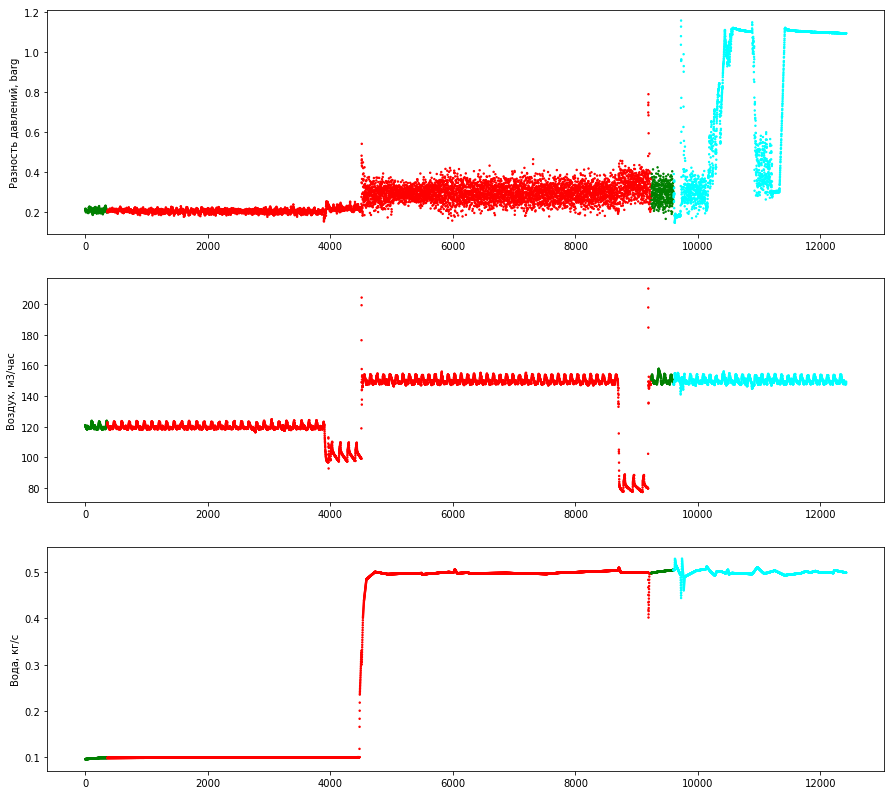

In [267]:
plot_graph(data2, data2['colorP'])

#### Вывод:

Можно заметить, что при стабильной работе потоков воды и воздуха при утечке воздуха возникает сильное колебание разности давлений.

### День 2

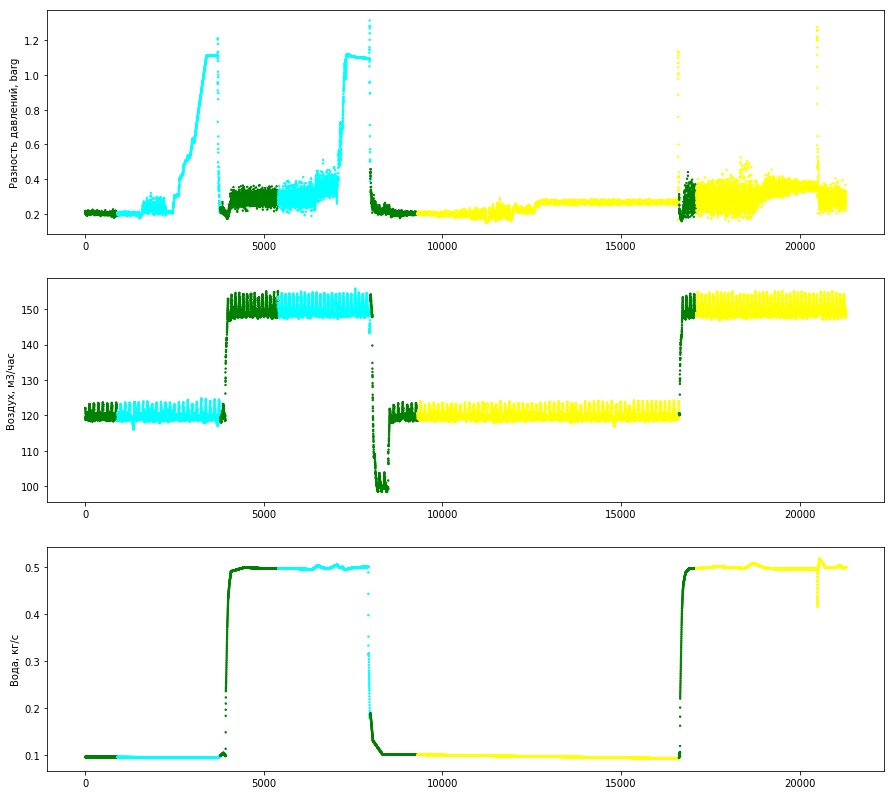

In [268]:
plot_graph(data3, data3['colorP'])

#### Вывод:

Аналогично дню 1, что при стабильной работе потоков воды и воздуха при утечке воздуха возникает скачок в разности давлений.

### День 3

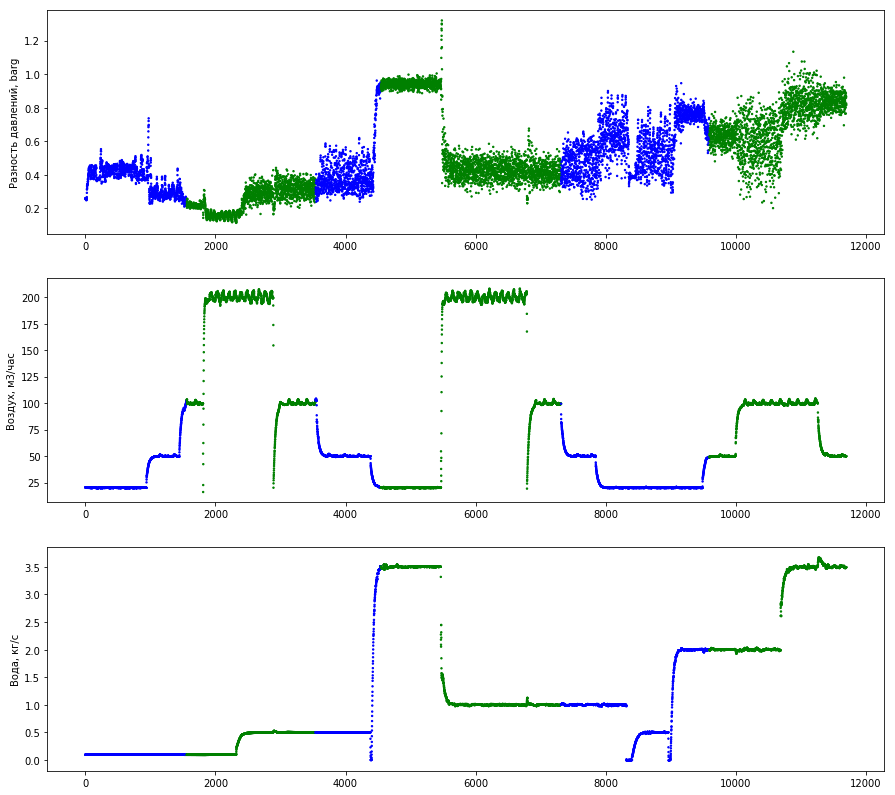

In [269]:
plot_graph(data4, data4['colorP'])

In [270]:
all_data = data2
all_data = all_data.append(data3, sort=False)
all_data = all_data.append(data4, sort=False)
all_data = all_data.reset_index()
all_data = all_data.drop(['index'], axis=1)
all_data = all_data.drop(['LI505'], axis=1)

### Все данные на одном графике

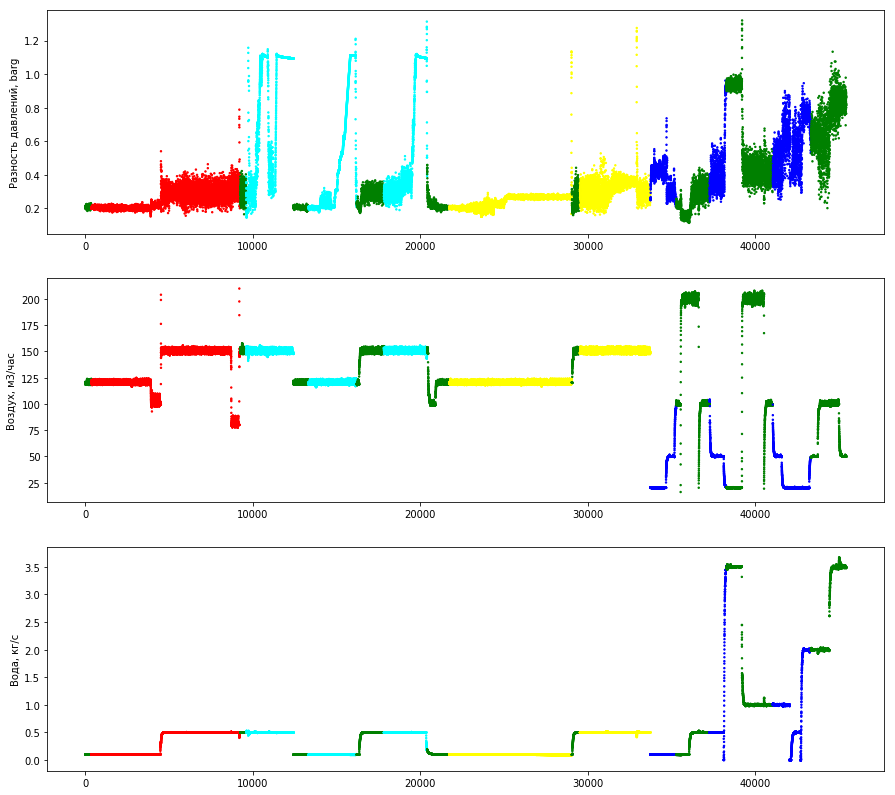

In [271]:
plot_graph(all_data, all_data['colorP'])

Text(0.5, 0, 'Вода, кг/с')

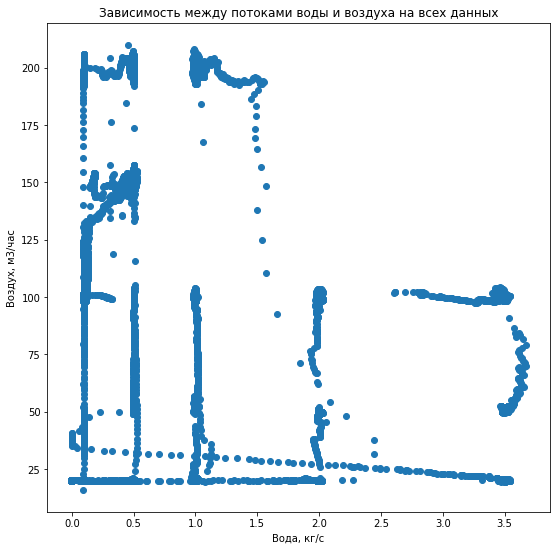

In [272]:
plt.figure(figsize=(9,9))
plt.title('Зависимость между потоками воды и воздуха на всех данных')
plt.scatter(all_data['WaterIn'], all_data['AirIn'])
plt.ylabel('Воздух, м3/час')
plt.xlabel('Вода, кг/с')

C:\Users\BMM98.LAPTOP-MDJU1CTL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


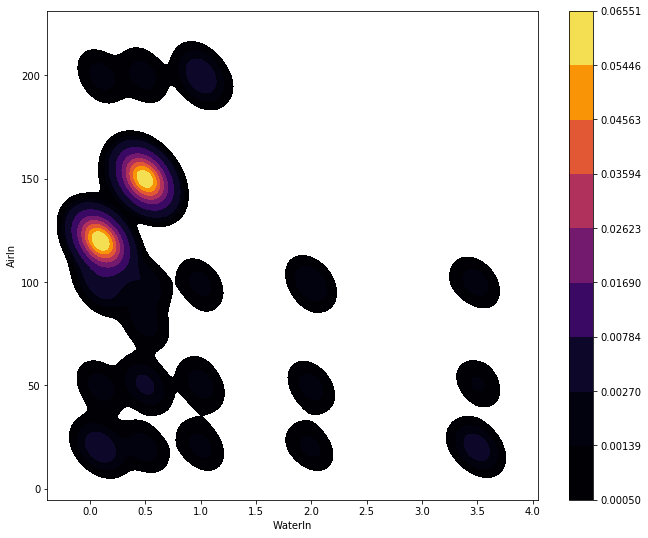

In [273]:
plt.figure(figsize=(11,9))
sns.kdeplot(all_data['WaterIn'], all_data['AirIn'], cmap='inferno', shade=True, cbar=True)

## Кластеризация по числу интервалов с определенными условиями и ошибками

In [274]:
x = all_data[['AirIn', 'WaterIn']].values
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_x = scaler.fit_transform(x)

In [275]:
model = KMeans(n_clusters=20) # 18 из данных таблицы документ + 2 специальных случая
model.fit(scaled_x)
clusters = model.labels_

centres = scaler.inverse_transform(model.cluster_centers_)

Text(0.5, 0, 'Вода, кг/с')

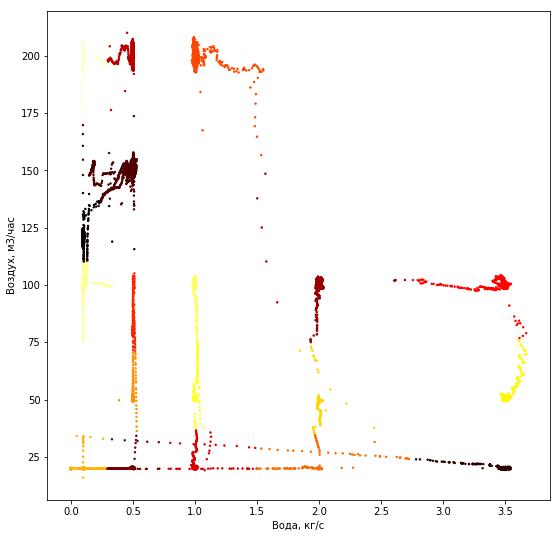

In [276]:
plt.figure(figsize=(9,9))
plt.scatter(all_data['WaterIn'], all_data['AirIn'], c = clusters, cmap='hot', s=2)
plt.ylabel('Воздух, м3/час')
plt.xlabel('Вода, кг/с')

Text(0.5, 0, 'Вода, кг/с')

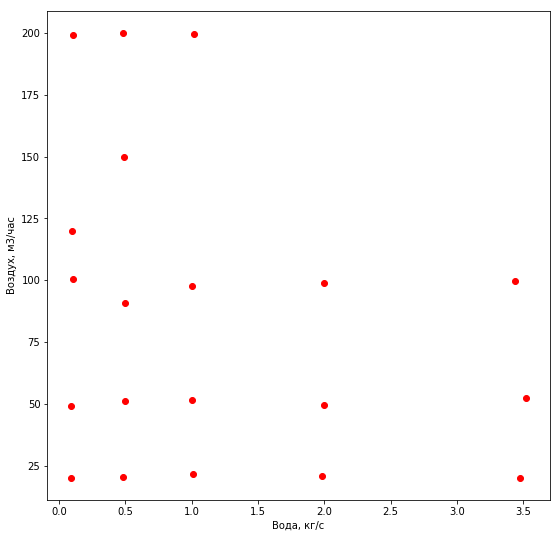

In [277]:
plt.figure(figsize=(9,9))
plt.scatter(centres[:,1], centres[:,0], c='red')
plt.ylabel('Воздух, м3/час')
plt.xlabel('Вода, кг/с')

Text(0.5, 0, 'Разность давлений, barg')

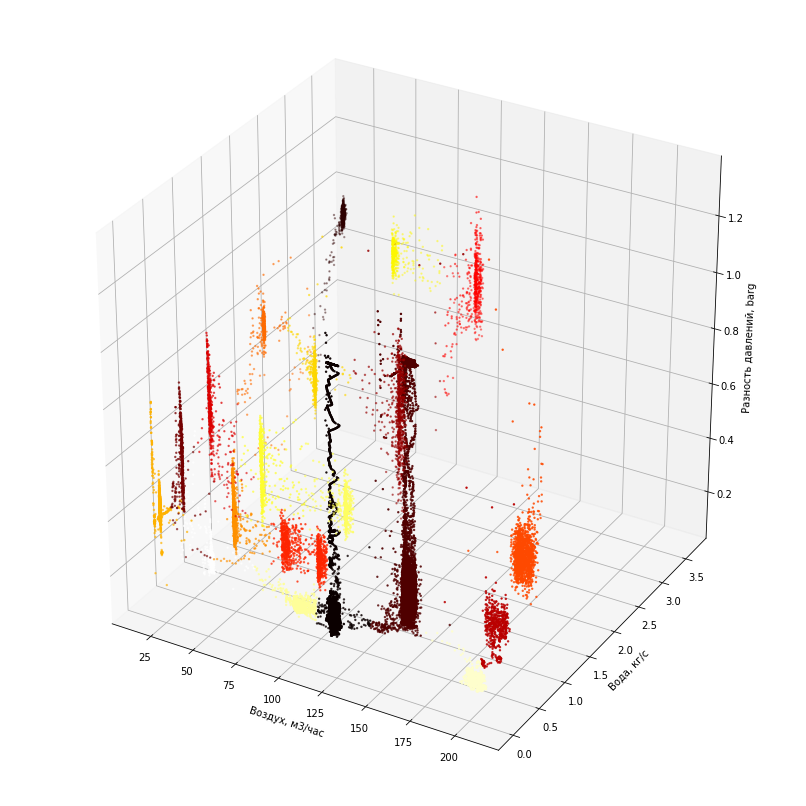

In [278]:
ax = Axes3D(plt.figure(figsize=(11,11)))
ax.scatter3D(all_data['AirIn'],all_data['WaterIn'],all_data['deltaP'], c=clusters, cmap='hot', s=2 )
ax.set_xlabel('Воздух, м3/час')
ax.set_ylabel('Вода, кг/с')
ax.set_zlabel('Разность давлений, barg')

#### Вывод: 

Удалось получить схожие с таблицей из документа центры кластеров.

### Формирование данных с одинаковым типом 

In [279]:
def form_data(fault):
    data = all_data.loc[all_data['Fault'] == fault]
    data = data.reset_index()
    data = data.drop(['index'], axis=1)
    return data

In [280]:
normal_data = form_data('Normal')
air_blockage_data = form_data('Air blockage')
diverted_flow_data = form_data('Diverted flow')
air_leakage_data = form_data('Air leakage')
slugging_data = form_data('Slugging')

In [281]:
def plot_for_data(data):
    fig = plt.figure(figsize=(16,7))
    ax = fig.add_subplot(1,2,1, projection='3d')
    ax.scatter3D(data['AirIn'],data['WaterIn'],data['deltaP'], c=data['colorP'], s=2 )
    ax.set_xlabel('Воздух, м3/час')
    ax.set_ylabel('Вода, кг/с')
    ax.set_zlabel('Разность давлений, barg')
    
    plt.subplot(1,2,2)
    plt.xlabel('Воздух, м3/час')
    plt.ylabel('Вода, кг/с')
    plt.scatter(data['AirIn'],data['WaterIn'], c=data['colorP'])

## 5. Построение моделей по данным

### 5.1. Модель нормального потока

На вход модели подаются потоки воды и воздуха. Результат (предсказание) модели - перепад давления в системе.

In [282]:
def plot_data_model(data):
    x = data[['AirIn', 'WaterIn']]
    y = data['deltaP']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, shuffle=False)
    
    model = LinearRegression()
    model.fit(x_train, y_train)

    print("MSE (train): ", np.sqrt(mean_squared_error(y_train, model.predict(x_train))))
    print("MSE (test): ", np.sqrt(mean_squared_error(y_test, model.predict(x_test))))
    print("R2 (train): ", np.sqrt(r2_score(y_train, model.predict(x_train))))
    print("R2 (test): ", np.sqrt(r2_score(y_test, model.predict(x_test))))
    
    y_pred = model.predict(x_test)
    
    fig = plt.figure(figsize=(22,22))
    ax = fig.add_subplot(2,2,1, projection='3d')
    ax.scatter3D(x_train['AirIn'], x_train['WaterIn'],y_train, c='r', s=10, label = 'Тренировочные')
    ax.scatter3D(x_test['AirIn'],x_test['WaterIn'], y_test, c='g', s=10, label = 'Тестовые')
    ax.scatter3D(x_test['AirIn'],x_test['WaterIn'], y_pred, c='black', s=10, label = 'Предсказанные')
    ax.set_xlabel('Воздух, м3/час')
    ax.set_ylabel('Вода, кг/с')
    ax.set_zlabel('Разность давлений, barg')
    ax.legend(loc = 'best')
    
    plt.subplot(2,2,3)
    cm = plt.cm.get_cmap('RdYlBu')
    plt.grid()
    sc = plt.scatter(x_test['AirIn'], y_pred, linewidth=3, c=x_test['WaterIn'], alpha = 0.3, cmap=cm)
    plt.xlabel('Воздух, м3/час')
    plt.ylabel('Разность давлений, barg')
    cbar = plt.colorbar(sc)
    cbar.set_label('Вода, кг/с')
    
    plt.subplot(2,2,4)
    cm = plt.cm.get_cmap('RdYlBu')
    plt.grid()
    sc = plt.scatter(x_test['WaterIn'], y_pred, linewidth=3, c=x_test['AirIn'], alpha = 0.3, cmap=cm)
    plt.xlabel('Вода, кг/с')
    plt.ylabel('Разность давлений, barg')
    cbar = plt.colorbar(sc)
    cbar.set_label('Воздух, м3/час')
    plt.show()
    
    plt.figure(figsize=(17,7))
    plt.scatter(data.index, y, c=data['colorP'], s=2, label = 'Реальные')
    plt.scatter(data.index, model.predict(x),c='black',s=2, label = 'Предсказанные')
    plt.xlabel('Измерения')
    plt.ylabel('Разность давлений, barg')
    plt.legend()

MSE (train):  0.04375240438118876
MSE (test):  0.09894991973602867
R2 (train):  0.9820772357972481
R2 (test):  0.8352449918373545


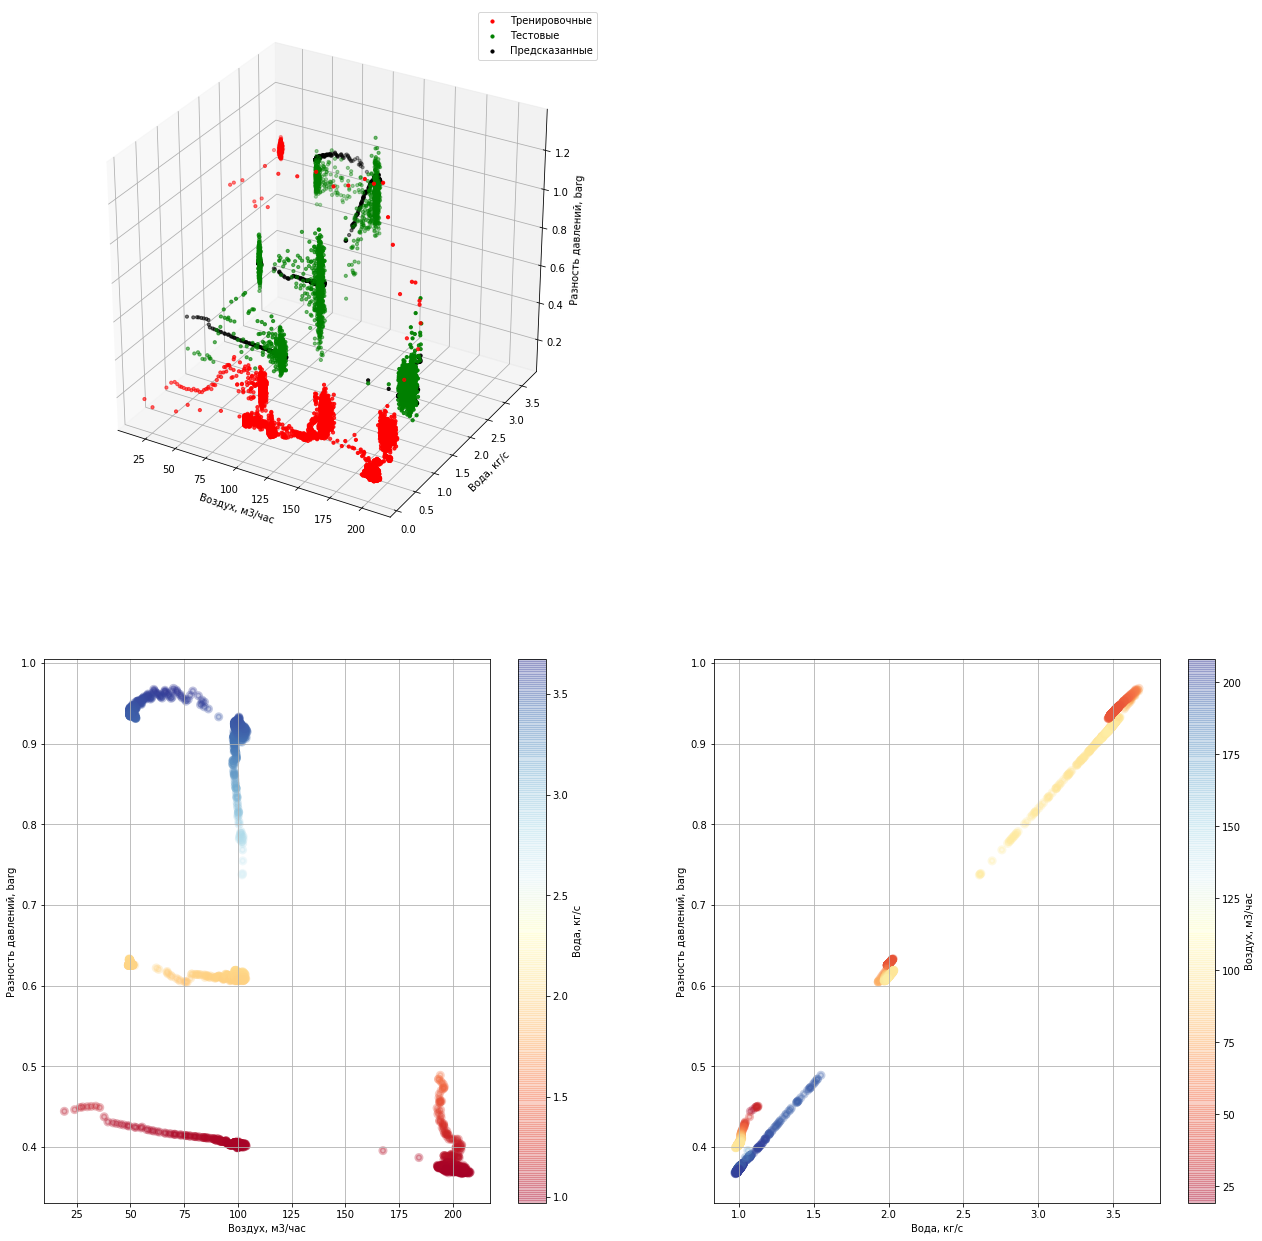

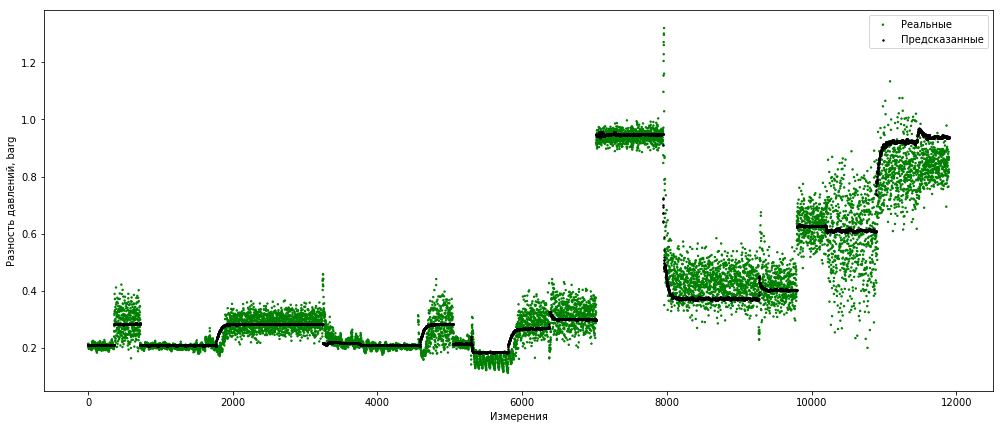

In [283]:
plot_data_model(normal_data)

### 5.2. Модель для пробок

MSE (train):  0.07365437997189546
MSE (test):  0.1253230205286653
R2 (train):  0.8033763848016016
R2 (test):  0.45971351496991325


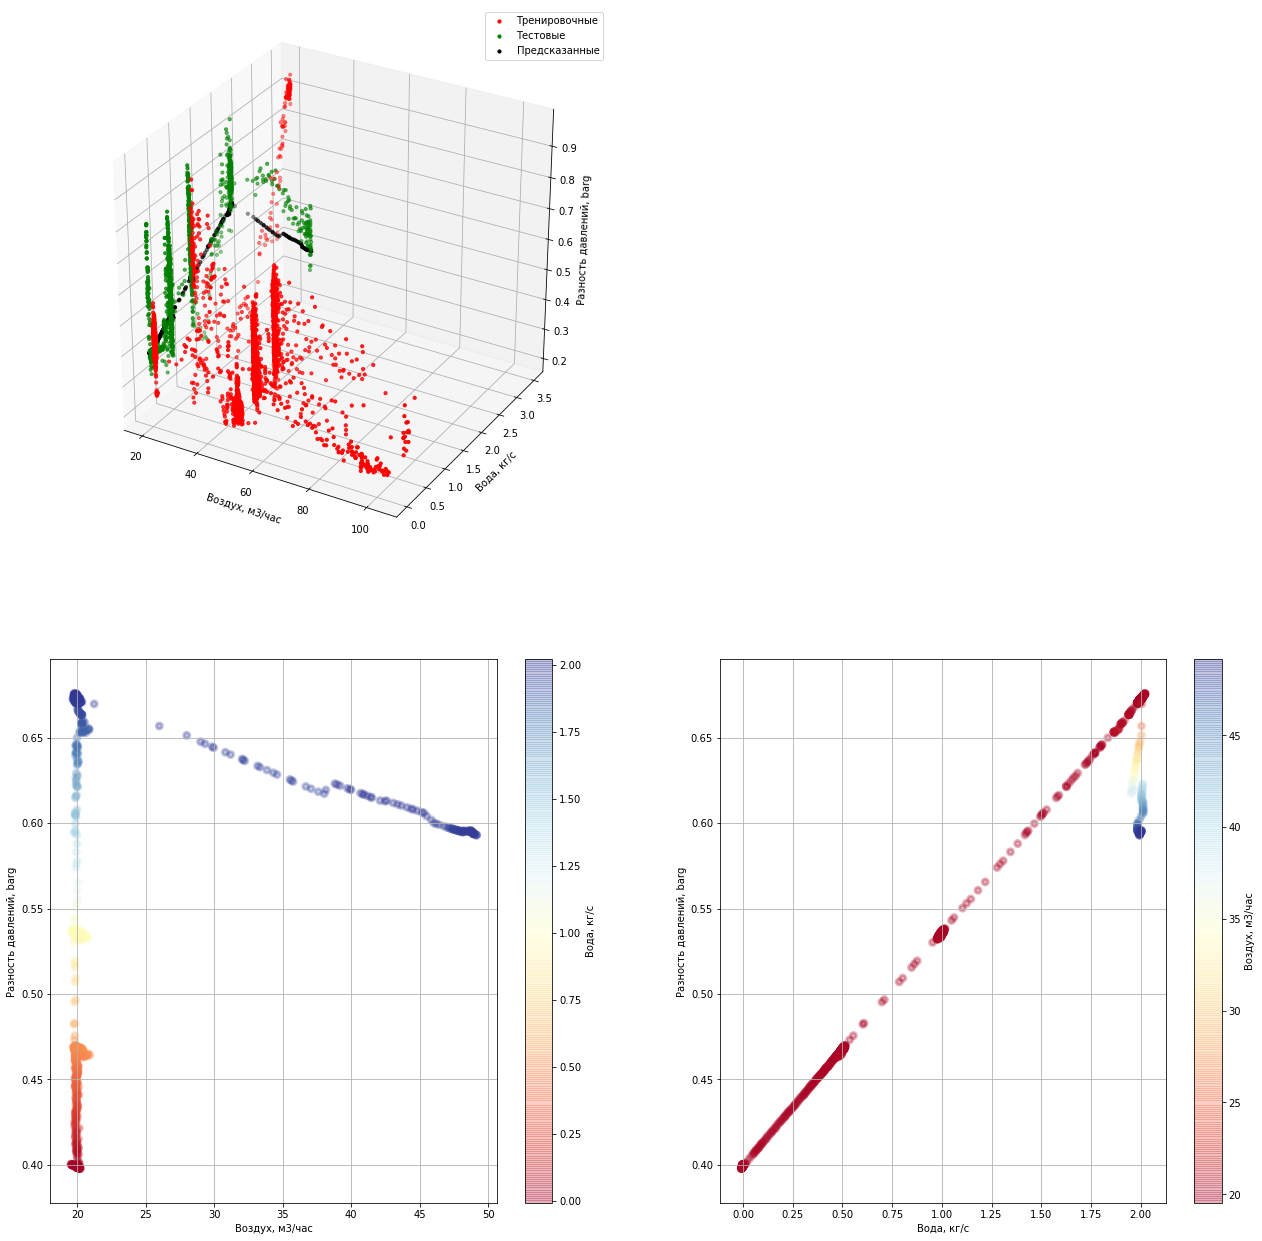

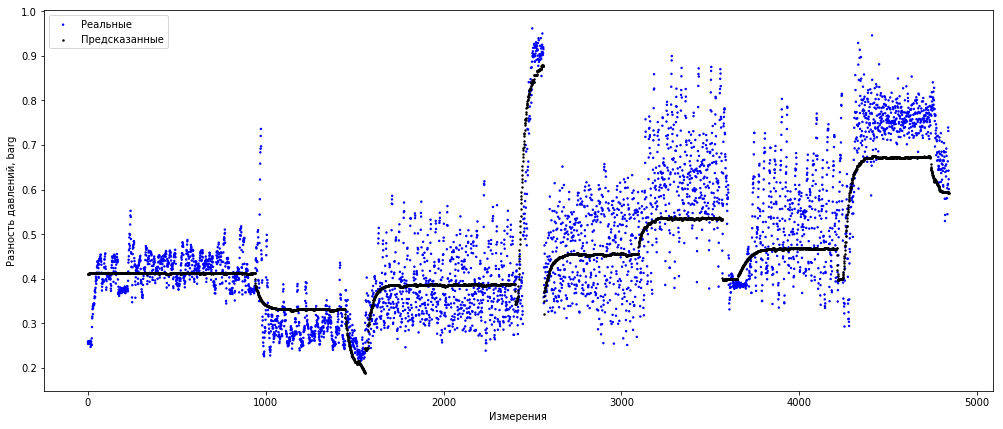

In [284]:
plot_data_model(slugging_data)

### 5.3. Модель для утечки воздуха

MSE (train):  0.33929757906786634
MSE (test):  0.419241740716217
R2 (train):  0.45443881033748895
R2 (test):  nan


C:\Users\BMM98.LAPTOP-MDJU1CTL\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


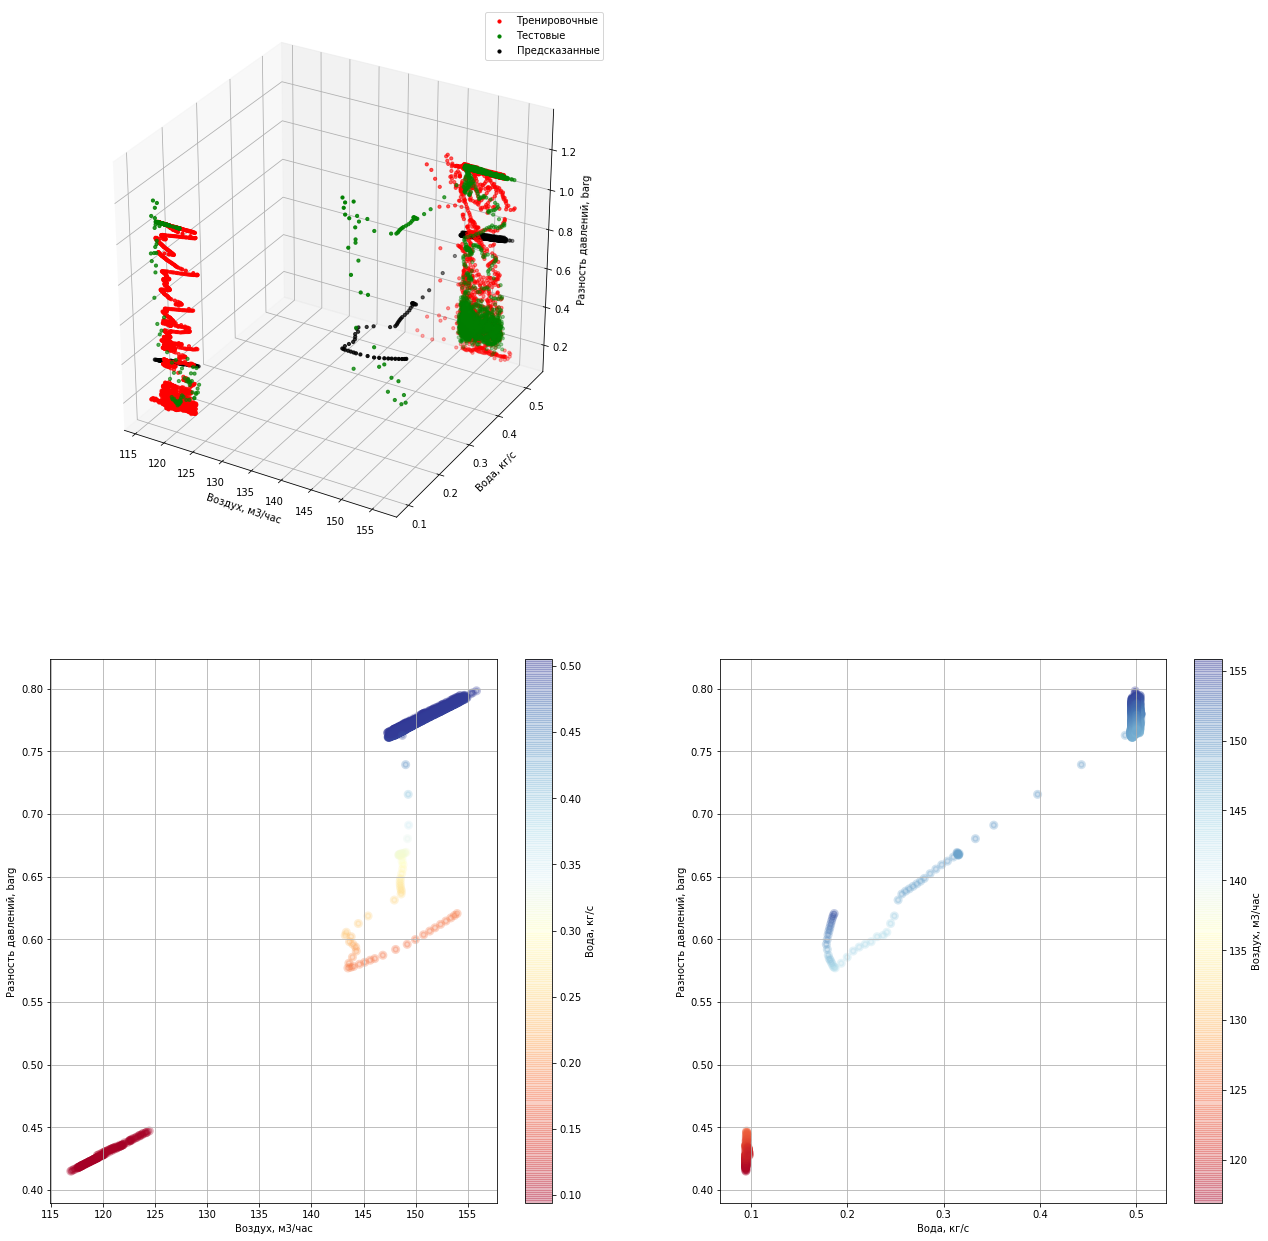

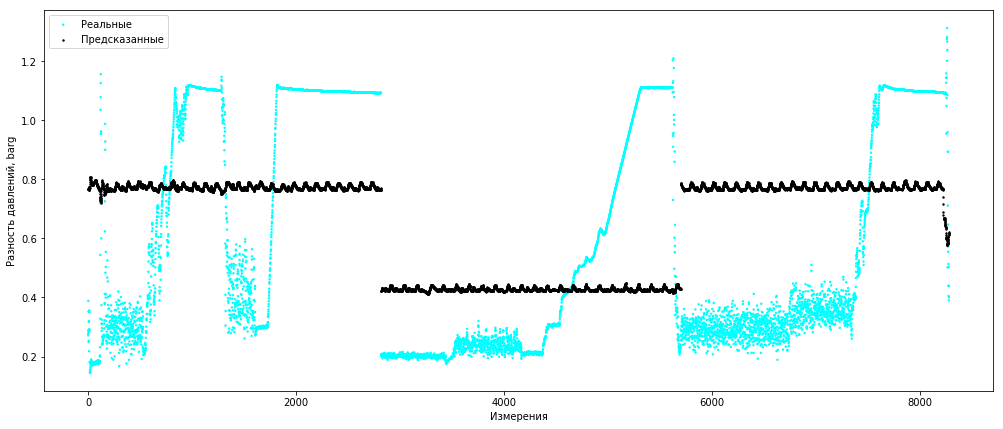

In [285]:
plot_data_model(air_leakage_data)

### 5.4. Модель блокировки воздуха

MSE (train):  0.024360147138952615
MSE (test):  0.048352103109202044
R2 (train):  0.8558354494391446
R2 (test):  0.16898306939775545


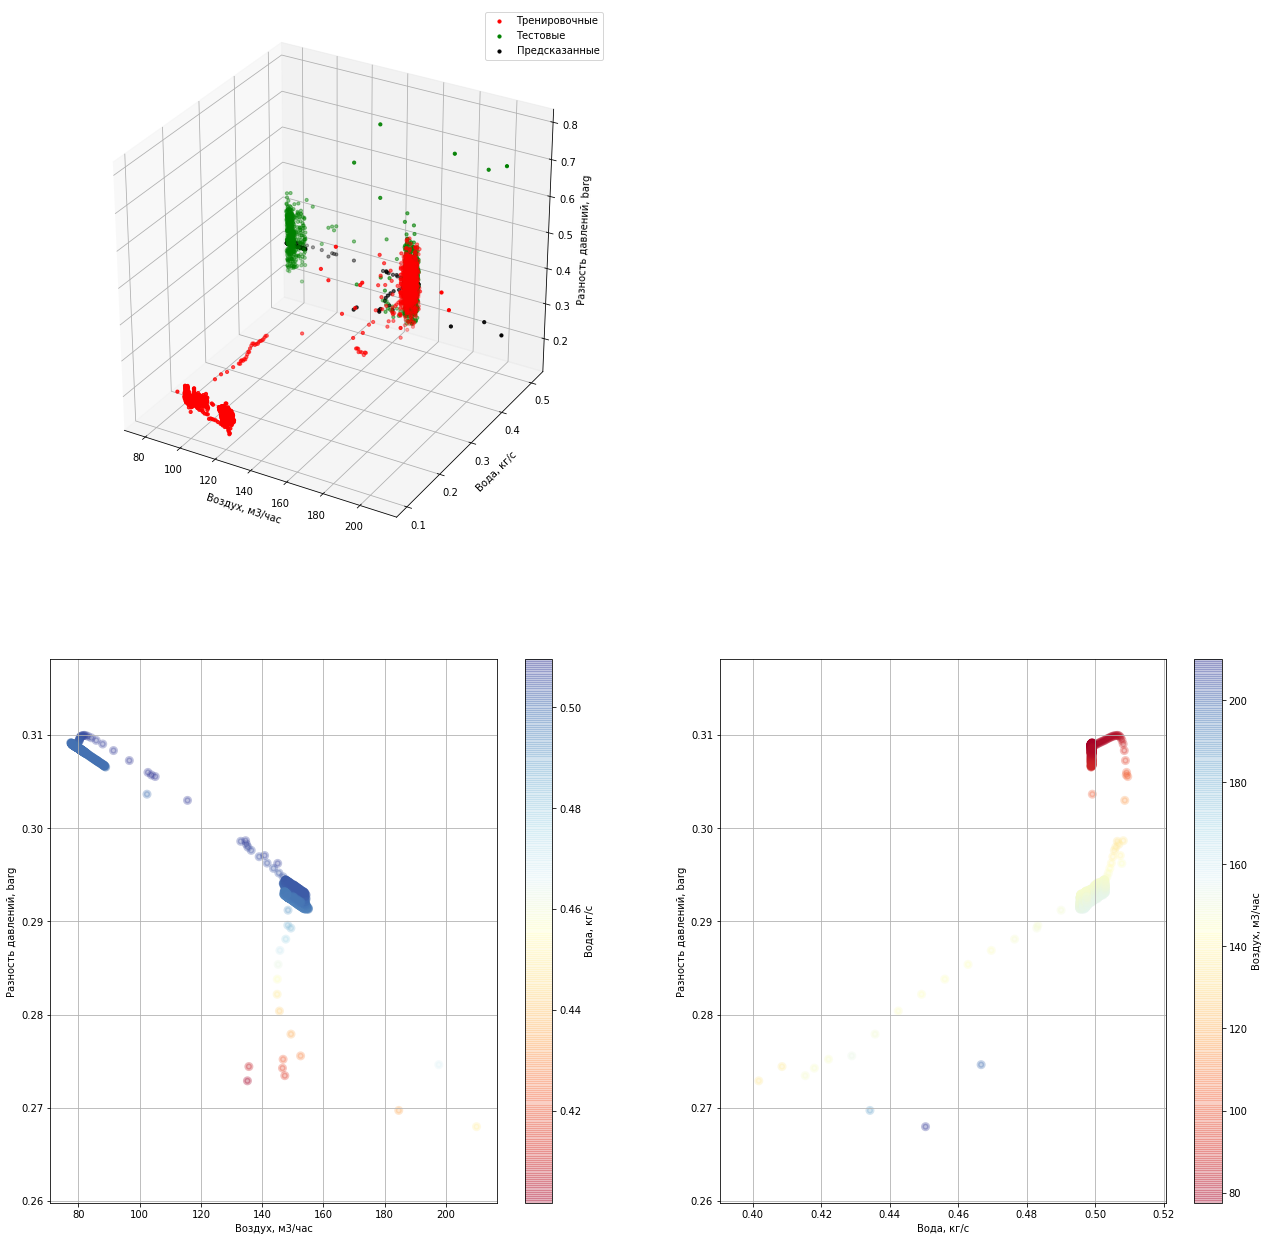

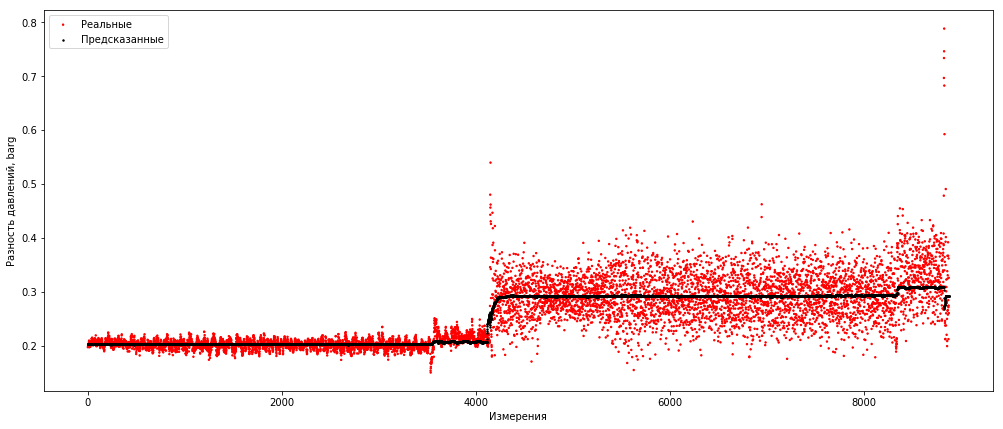

In [286]:
plot_data_model(air_blockage_data)

### 5.5. Модель перенаправленного потока

MSE (train):  0.0483238907389504
MSE (test):  0.07677411136496654
R2 (train):  0.21932429599709605
R2 (test):  nan


C:\Users\BMM98.LAPTOP-MDJU1CTL\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


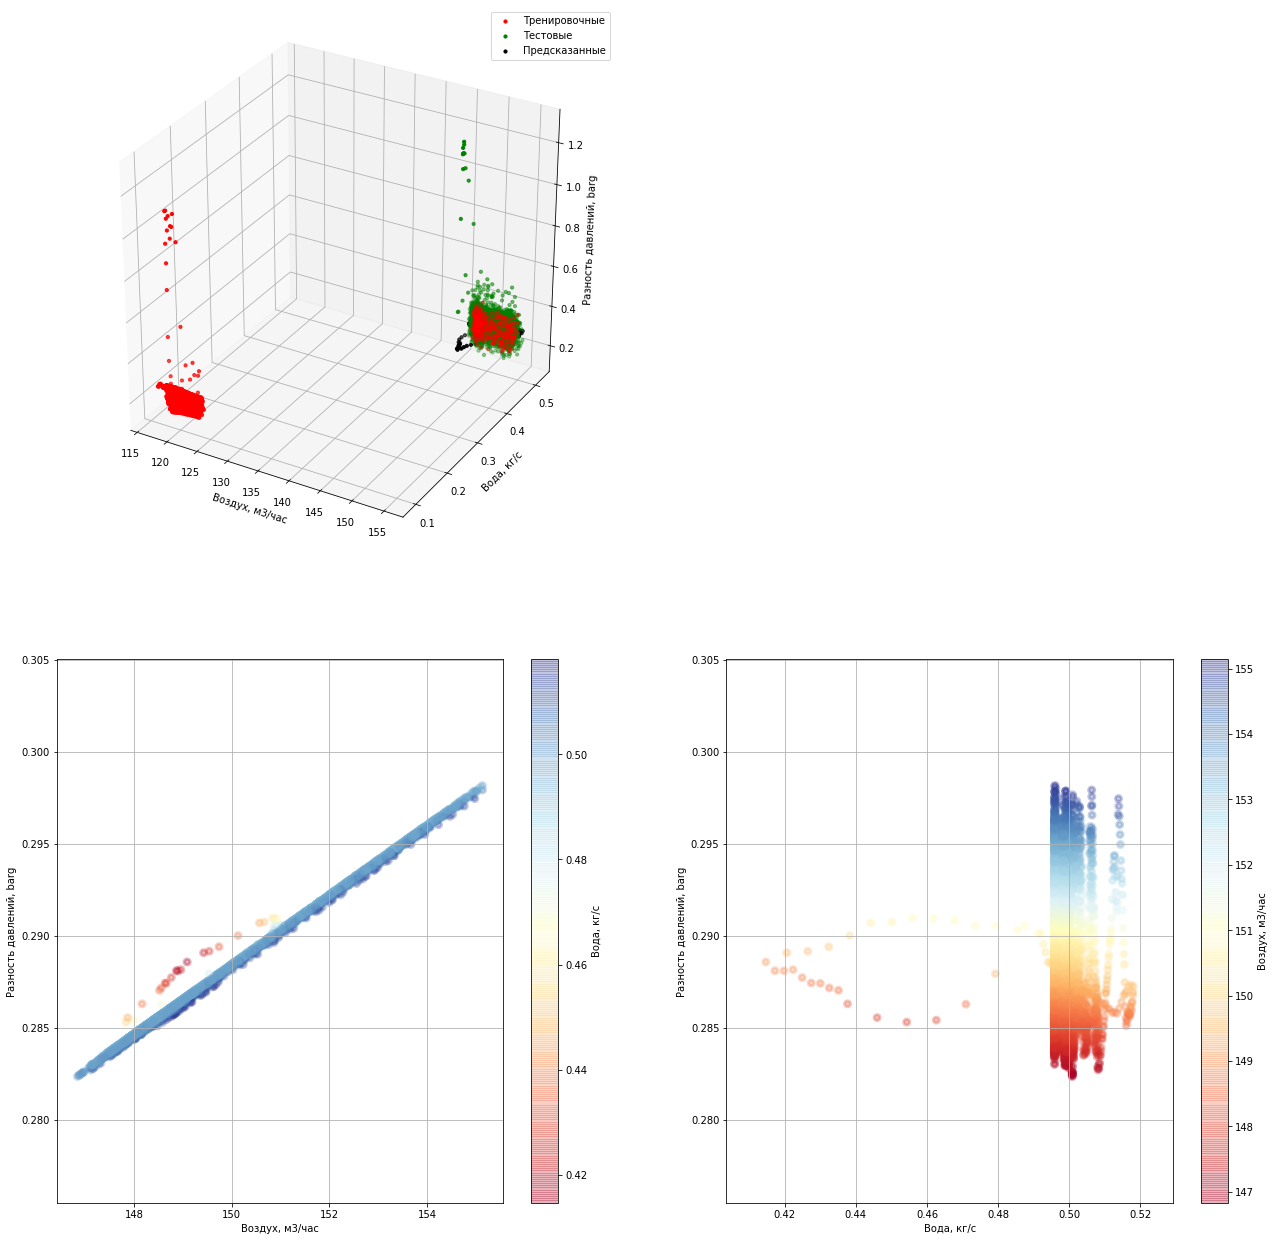

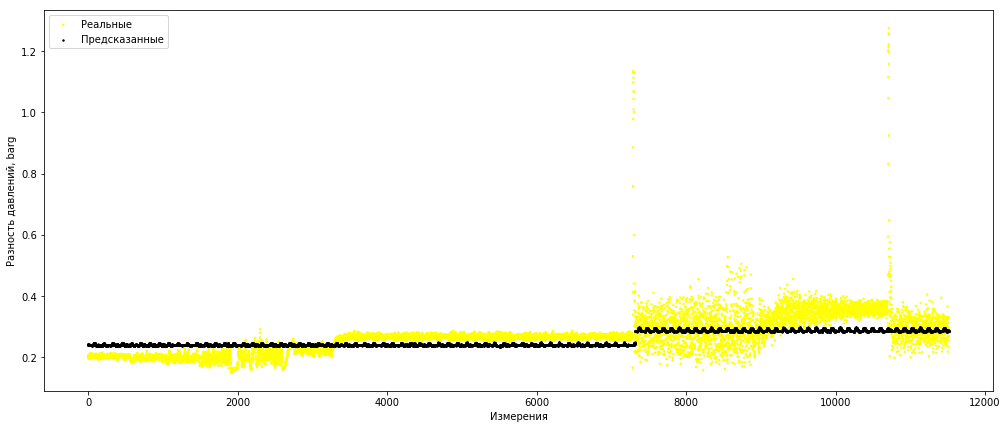

In [287]:
plot_data_model(diverted_flow_data)

### 5.6. Модель на всех данных

MSE (train):  0.2344085600625216
MSE (test):  0.24417525142798638
R2 (train):  0.36710050195757316
R2 (test):  nan


C:\Users\BMM98.LAPTOP-MDJU1CTL\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


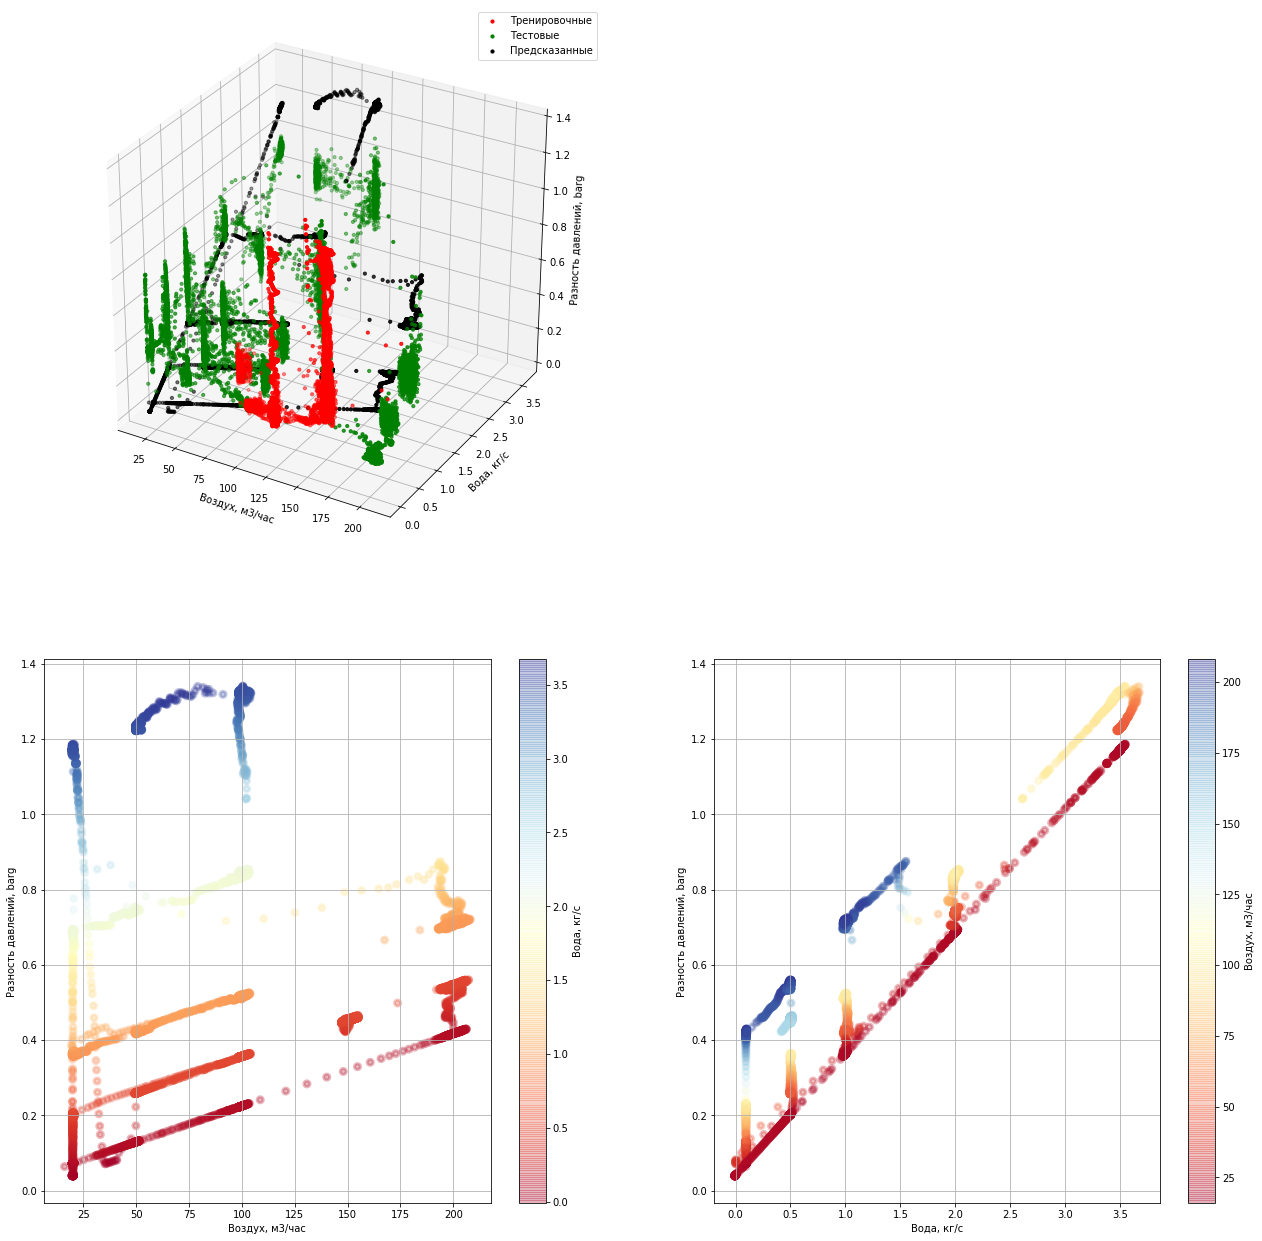

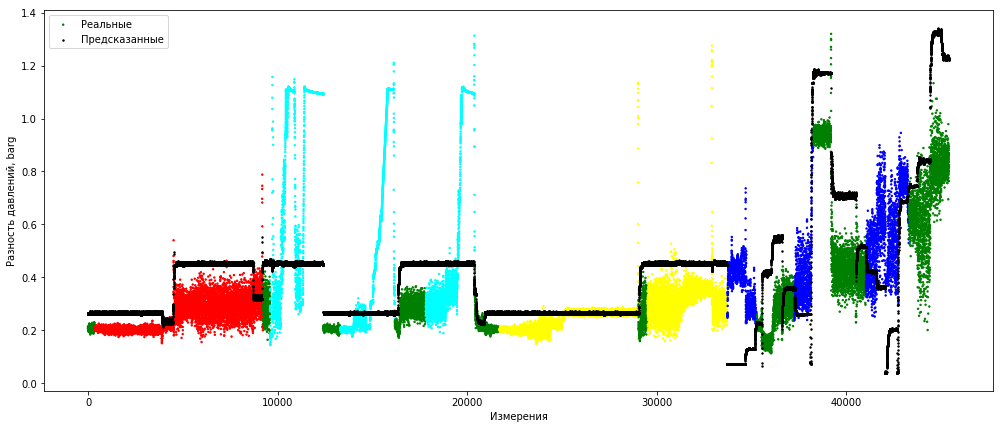

In [288]:
plot_data_model(all_data)

## 6. Методика проверки эффективности моделей

Сравнивал модели с помощью метода LOO. Обучение и тестирование проводил на центрах кластеров.

In [289]:
def LOO_mse(model, centres):
    loo = LeaveOneOut()
    mse_train_list =[]
    mse_test_list =[]
    for train_index, test_index in loo.split(centres[['AirIn', 'WaterIn']], centres['deltaP']):
        x_train = centres[['AirIn', 'WaterIn']].loc[train_index].values
        y_train = centres['deltaP'].loc[train_index].values
        x_test = centres[['AirIn', 'WaterIn']].loc[test_index].values
        y_test = centres['deltaP'].loc[test_index].values
    
        model.fit(x_train, y_train)
        
        mse_train = mean_squared_error(y_train, model.predict(x_train))
        mse_train_list.append(mse_train)
        mse_test = mean_squared_error(y_test, model.predict(x_test))
        mse_test_list.append(mse_test)
        
    print(f'max train MSE: {np.max(mse_train_list)}')
    print(f'min train MSE: {np.min(mse_train_list)}\n')
    print(f'max test MSE: {np.max(mse_test_list)}')
    print(f'min test MSE: {np.min(mse_test_list)}\n')
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
    ax1.bar([i for i in range(centres.shape[0])], height=mse_train_list)
    ax1.set_ylabel('MSE')
    ax2.bar([i for i in range(centres.shape[0])], height=mse_test_list)
    ax2.set_ylabel('MSE')
    
    return (np.mean(mse_train_list), np.mean(mse_test_list))

def plot_model1(model):
    deltaP_predicted = model.predict(normal_data[['AirIn', 'WaterIn']].values)
    plt.figure(figsize=(15, 8))
    plt.scatter(normal_data.index, normal_data['deltaP'], c='green', s=2)
    plt.scatter(normal_data.index, deltaP_predicted, c='blue', s=2)
    plt.ylabel('deltaP')
    plt.legend(['Real', 'Predicted'])

def loo_for_data(data, num_clusters):
    plot_for_data(data)
    
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaled = scaler.fit_transform(data[['AirIn', 'WaterIn']].values)
    
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled)

    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    data['cluster'] = kmeans.labels_
    
    mean_by_clusters = data.groupby(data.cluster).mean()
    mean_by_clusters['colorP']= data['colorP']
    
    plt.figure(figsize=(11, 11))
    ax = plt.axes(projection='3d')
    ax.scatter3D(mean_by_clusters['AirIn'], mean_by_clusters['WaterIn'], mean_by_clusters['deltaP'], c=mean_by_clusters['colorP'])
    ax.set_xlabel('Воздух, м3/час')
    ax.set_ylabel('Вода, кг/с')
    ax.set_zlabel('Разность давлений, barg')
    
    linear = LinearRegression()

    train_mse_average, test_mse_average = LOO_mse(linear, mean_by_clusters)

    print(f'train average MSE: {train_mse_average}')
    print(f'test  average MSE: {test_mse_average}')

    linear.fit(mean_by_clusters[['AirIn', 'WaterIn']].values, mean_by_clusters[['deltaP']].values)
    plot_model1(linear)
    

 ### Нормальные данные

max train MSE: 0.0011730610309735072
min train MSE: 0.0005650921137362404

max test MSE: 0.01076587415623742
min test MSE: 6.554784913512947e-07

train average MSE: 0.0010439906736090655
test  average MSE: 0.0022265071800123583


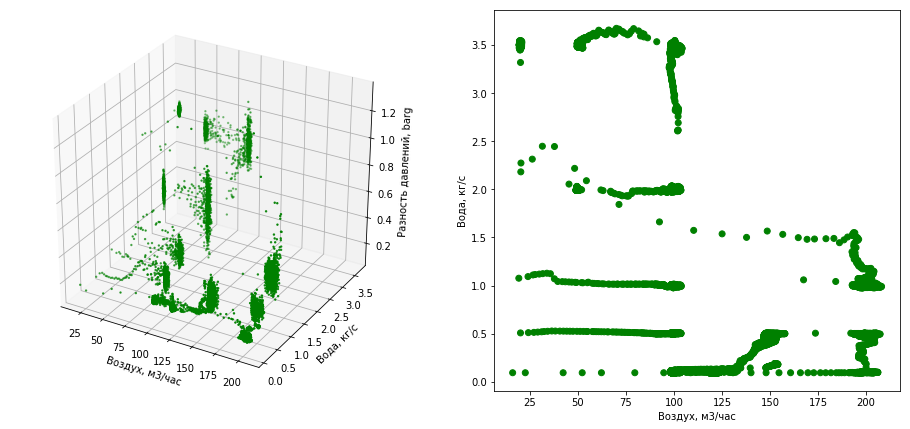

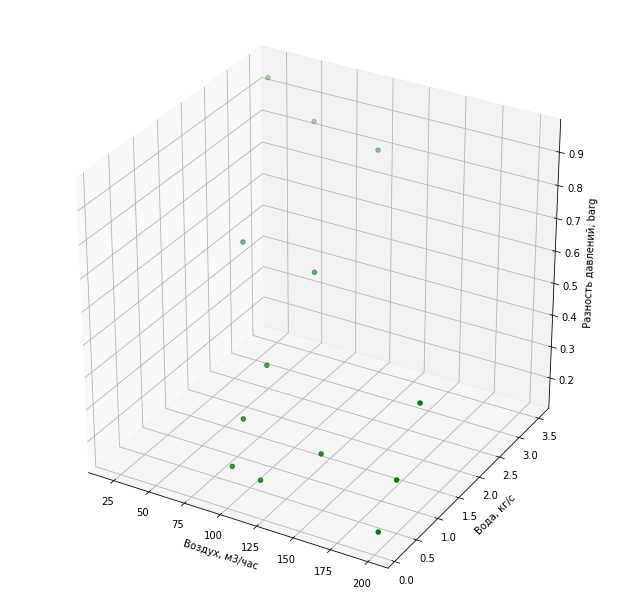

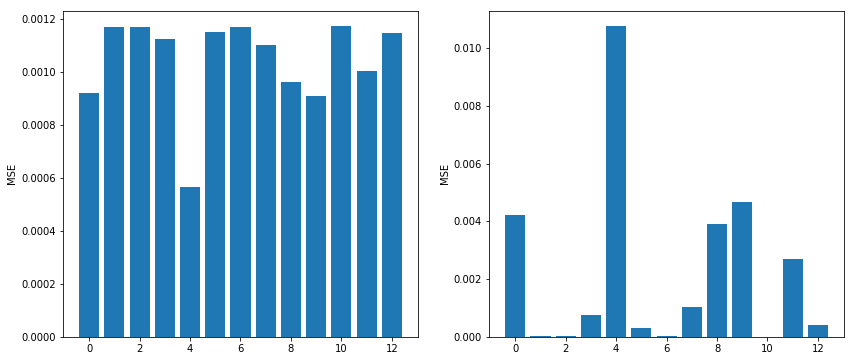

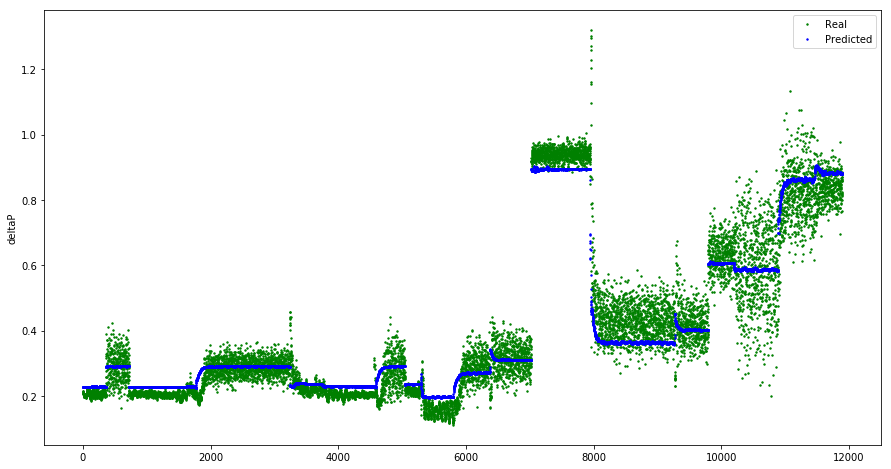

In [290]:
loo_for_data(normal_data, 13)